**В данном блокноте продемонстрирована работа KAN на "игрушечном" датасете ирисов Фишера.**


*   Размерность датасета не понижалась, сеть обучалась на 4-мерной выборке.
*   Сеть имеет 3 слоя: [4, 10, 3], где 4 - размерность пространства признаков, 3 - количество классов, 10 - по изначальной теореме Колмогорова-Арнольда размерность второго слоя KAN = 2 * 4 + 1
*   По графикам наглядно видно соответствие результата классификации



In [ ]:
pip install pykan

In [ ]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

<Axes3D: title={'center': 'Irises'}, xlabel='Sepal Length', ylabel='Sepal Width', zlabel='Petal Length'>

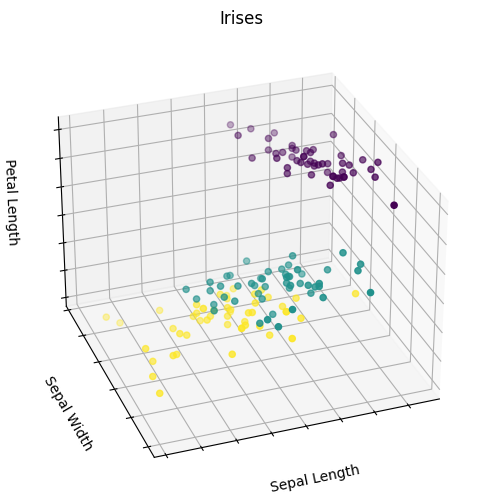

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(xs=data.data[:, 0], ys=data.data[:, 1], zs=data.data[:, 2], c=data.target)
ax.set_title("Irises")
ax.set_xlabel("Sepal Length")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.zaxis.set_ticklabels([])
ax

In [ ]:
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = KAN(width=[4, 10, 3], k=3, grid=3)

In [ ]:
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train)
dataset['test_input'] = torch.from_numpy(X_test)
dataset['train_label'] = torch.from_numpy(y_train)
dataset['test_label'] = torch.from_numpy(y_test)

In [ ]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=50, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());
results['train_acc'][-1], results['test_acc'][-1]

train loss: 2.10e-07 | test loss: 9.92e-01 | reg: 6.26e+02 : 100%|██| 50/50 [00:31<00:00,  1.56it/s]


(1.0, 0.9666666388511658)

In [ ]:
res = model(torch.from_numpy(X))

In [ ]:
res_lst = res.tolist()
res_lst = [x.index(max(x)) for x in res_lst]
res = torch.tensor(res_lst)
res

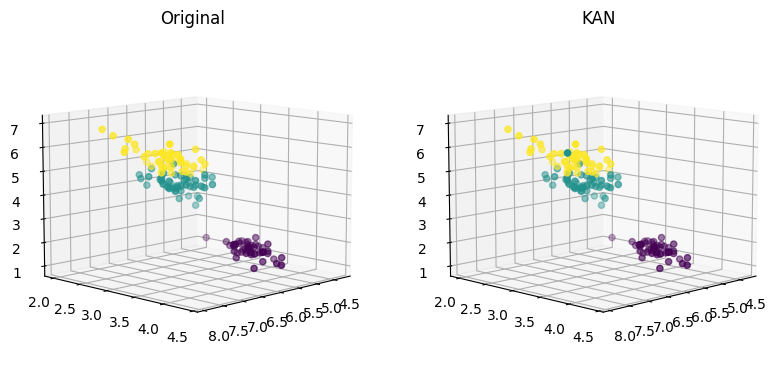

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection="3d", elev=10, azim=45)
ax1.set_title("Original")
scatter1 = ax1.scatter(xs=data.data[:, 0], ys=data.data[:, 1], zs=data.data[:, 2], c=data.target)

ax2 = fig.add_subplot(1, 2, 2, projection="3d", elev=10, azim=45)
ax2.set_title("KAN")
scatter2 = ax2.scatter(xs=data.data[:, 0], ys=data.data[:, 1], zs=data.data[:, 2], c=res)

In [ ]:
def update(frame):
    ax1.view_init(frame/8, frame)
    ax2.view_init(frame/8, frame)
    return scatter1, scatter2

ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), blit=True, interval=33)

HTML(ani.to_html5_video())

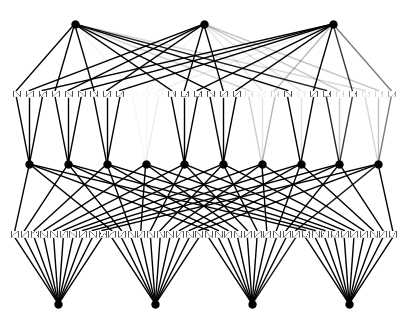

In [ ]:
model.plot()

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sqrt, r2=0.9750829708997956
fixing (0,0,1) with sqrt, r2=0.9946656025200026
fixing (0,0,2) with x^2, r2=0.6744558211513549
fixing (0,0,3) with tanh, r2=0.9980939860537014
fixing (0,0,4) with sqrt, r2=0.9999802715623783
fixing (0,0,5) with tanh, r2=0.999809731093238
fixing (0,0,6) with sqrt, r2=0.9561877208618396
fixing (0,0,7) with sqrt, r2=0.9999961837297697
fixing (0,0,8) with x^2, r2=0.9999958903348144
fixing (0,0,9) with sin, r2=0.9235593286929947
fixing (0,1,0) with log, r2=0.9947294846041539
fixing (0,1,1) with tanh, r2=0.9989043738296399
fixing (0,1,2) with tanh, r2=0.9998684534511879
fixing (0,1,3) with tanh, r2=0.999953402625555
fixing (0,1,4) with tanh, r2=0.9997799750377074
fixing (0,1,5) with tanh, r2=0.9997872434908049
fixing (0,1,6) with tanh, r2=0.9999101646742435
fixing (0,1,7) with tanh, r2=0.999926831227338
fixing (0,1,8) with tanh, r2=0.999907998487634
fixing (0,1,9) with tanh, r2=0.9995041734725095
fixing (0,2,0) with tanh, r2=0.9998066835292652


In [ ]:
formula1 = model.symbolic_formula()[0]

In [ ]:
formula1[0]

-1363.2*(0.16*(1 - 0.17*x_1)**2 + 0.19*tanh(1.16*x_2 - 3.67) - tanh(0.21*x_3 - 0.2) - 0.07*tanh(2.25*x_4 - 1.29) - 0.07)**2 - 467335.67*(0.43*(1 - 0.02*x_3)**2 + 0.57*sqrt(0.03*x_1 + 1) - 0.02*sin(0.65*x_4 + 5.16) + 0.02*tanh(1.23*x_2 - 3.99) - 1)**2 + 4.45*sin(7.05*(1 - 0.05*x_3)**3 + 3.27*sqrt(0.26*x_1 - 1) + 2.75*tanh(0.62*x_2 - 1.94) - 0.1*Abs(6.84*x_4 - 0.81) - 4.23) - 5.41*sin(0.46*sin(2.24*x_1 + 1.6) - 4.11*sin(1.48*x_4 + 9.74) + 0.69*tanh(0.84*x_2 - 2.8) - 0.4*tanh(0.37*x_3 - 2.05) + 2.74) + 415.91*tanh(75.09*(1 - 0.02*x_1)**2 - 9.0*tanh(0.86*x_2 - 2.4) + 37.15*tanh(0.16*x_3 - 0.48) + 3.91*tanh(0.94*x_4 - 1.0) - 73.38) - 2.2*tanh(3.39*sin(1.61*x_4 - 9.4) - 551.71*tanh(0.22*x_1 + 1.4) + 2.47*tanh(1.18*x_2 - 3.7) - 9.06*tanh(0.43*x_3 - 0.9) + 541.74) - 17.92*Abs(599.3*(1 - 0.04*x_3)**2 + 36.65*sin(0.67*x_4 + 8.51) - 6.82*tanh(0.99*x_1 - 5.88) + 23.74*tanh(1.53*x_2 - 5.0) - 572.35) - 20.68*Abs(-1513.04*sqrt(0.02*x_1 + 1) - 46.77*tanh(0.82*x_2 - 2.4) + 181.36*tanh(0.18*x_3 - 0.59) 

In [ ]:
formula1[1]

620.67*(0.16*(1 - 0.17*x_1)**2 + 0.19*tanh(1.16*x_2 - 3.67) - tanh(0.21*x_3 - 0.2) - 0.07*tanh(2.25*x_4 - 1.29) - 0.08)**2 + 134588.02*(0.43*(1 - 0.02*x_3)**2 + 0.57*sqrt(0.03*x_1 + 1) - 0.02*sin(0.65*x_4 + 5.16) + 0.02*tanh(1.23*x_2 - 3.99) - 1)**2 - 141430.48*(-0.87*sqrt(0.02*x_1 + 1) - 0.03*tanh(0.82*x_2 - 2.4) + 0.1*tanh(0.18*x_3 - 0.59) + 0.01*tanh(1.06*x_4 - 1.25) + 1)**4 + 218.76*sqrt(0.16*sqrt(0.24*x_1 - 1) + 0.55*log(6.41*x_2 - 9.2) + 0.68*sin(1.0*x_4 - 8.8) - tanh(0.34*x_3 - 1.0) + 0.6) + 1408.82*sin(-0.25*sqrt(0.57*x_1 - 1) + 0.18*sin(0.14*x_3 - 7.0) - 0.05*tanh(1.55*x_2 - 5.2) + 0.08*tanh(1.06*x_4 - 2.08) + 0.3) - 65.39*tanh(60.07*(1 - 0.02*x_1)**2 - 7.2*tanh(0.86*x_2 - 2.4) + 29.72*tanh(0.16*x_3 - 0.48) + 3.13*tanh(0.94*x_4 - 1.0) - 58.71) - 2.69*tanh(10.53*(1 - 0.05*x_3)**3 + 4.89*sqrt(0.26*x_1 - 1) + 4.11*tanh(0.62*x_2 - 1.94) - 0.14*Abs(6.84*x_4 - 0.81) - 6.76) + 57.79*tanh(0.8*sin(2.24*x_1 + 1.6) - 7.25*sin(1.48*x_4 + 9.74) + 1.22*tanh(0.84*x_2 - 2.8) - 0.71*tanh(0.37*

In [ ]:
formula1[2]

805.97*(0.16*(1 - 0.17*x_1)**2 + 0.19*tanh(1.16*x_2 - 3.67) - tanh(0.21*x_3 - 0.2) - 0.07*tanh(2.25*x_4 - 1.29) - 0.05)**2 + 337523.55*(0.43*(1 - 0.02*x_3)**2 + 0.57*sqrt(0.03*x_1 + 1) - 0.02*sin(0.65*x_4 + 5.16) + 0.02*tanh(1.23*x_2 - 3.99) - 1)**2 + 71.95*(0.11*sin(2.24*x_1 + 1.6) - sin(1.48*x_4 + 9.74) + 0.17*tanh(0.84*x_2 - 2.8) - 0.1*tanh(0.37*x_3 - 2.05) - 0.36)**4 + 4.49*sin(6.83*(1 - 0.05*x_3)**3 + 3.17*sqrt(0.26*x_1 - 1) + 2.67*tanh(0.62*x_2 - 1.94) - 0.09*Abs(6.84*x_4 - 0.81) + 5.97) - 335.09*tanh(78.84*(1 - 0.02*x_1)**2 - 9.45*tanh(0.86*x_2 - 2.4) + 39.01*tanh(0.16*x_3 - 0.48) + 4.11*tanh(0.94*x_4 - 1.0) - 77.1) + 11.84*Abs(605.37*(1 - 0.04*x_3)**2 + 37.02*sin(0.67*x_4 + 8.51) - 6.89*tanh(0.99*x_1 - 5.88) + 23.98*tanh(1.53*x_2 - 5.0) - 578.15) + 32.49*Abs(-1012.16*sqrt(0.02*x_1 + 1) - 31.29*tanh(0.82*x_2 - 2.4) + 121.32*tanh(0.18*x_3 - 0.59) + 16.61*tanh(1.06*x_4 - 1.25) + 1018.85) + 1.59*Abs(24.98*sqrt(0.24*x_1 - 1) + 86.3*log(6.41*x_2 - 9.2) + 106.76*sin(1.0*x_4 - 8.8) - 1